# Bank Marketing DataSet - Intelligent Targeting:
***
## Marketing Introduction:
*The process by which companies create value for customers and build strong customer relationships in order to capture value from customers in return.*

**Kotler and Armstrong (2010).**
***

**Marketing campaigns** are characterized by  focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign. <br>

## The 4 Ps:
1) Segment of the <b>Population:</b> To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell to which part of the population should most likely receive the message of the marketing campaign. <br><br>
2) Distribution channel to reach the customer's <b>place</b>: Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.)<br><br>
3) <b> Price:</b> What is the best price to offer to potential clients? (In the case of the bank's marketing campaign this is not necessary since the main interest for the bank is for potential clients to open depost accounts in order to make the operative activities of the bank to keep on running.)<br><br>
4) <b> Promotional</b> Strategy: This is the way the strategy  is going to be implemented and how are potential clients going to be address. This should be the last part of the marketing campaign analysis since there has to be an indepth analysis of previous campaigns (If possible) in order to learn from previous mistakes and to determine how to make the marketing campaign much more effective.

# A. Attributes Description: <br>

Input variables:<br>
# Ai. bank client data:<br>
<a id="bank_client_data"></a>
1 - **age:** (numeric)<br>
2 - **job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - **marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - **education:** (categorical: primary, secondary, tertiary and unknown)<br>
5 - **default:** has credit in default? (categorical: 'no','yes','unknown')<br>
6 - **housing:** has housing loan? (categorical: 'no','yes','unknown')<br>
7 - **loan:** has personal loan? (categorical: 'no','yes','unknown')<br>
8 - **balance:** Balance of the individual.
# Aii. Related with the last contact of the current campaign:
<a id="last_contact"></a>
8 - **contact:** contact communication type (categorical: 'cellular','telephone') <br>
9 - **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - **day:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
# Aiii. other attributes:<br>
<a id="other_attributes"></a>
12 - **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - **previous:** number of contacts performed before this campaign and for this client (numeric)<br>
15 - **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

Output variable (desired target):<br>
21 - **y** - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('bank_marketing.csv')

In [3]:
df.head()

age        job marital_status    education  default housing loan  \
0   56  housemaid        married     basic.4y       no      no   no   
1   57   services        married  high.school  unknown      no   no   
2   37   services        married  high.school       no     yes   no   
3   40     admin.        married     basic.6y       no      no   no   
4   56   services        married  high.school       no      no  yes   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  \
0          1.1          93.994          -36.4      4.857       5191.0   
1          1.1          93.994          -36.4      4.857       5191.0   
2          1.1          93.994          -36.4      4.857       5191.0   
3          1.1          93.994          -36.4      4.857       5191.0   
4          1.1          93.994          -36.4      4.857       5191.0   

   response  
0        no  
1        no  
2        no  
3        no  
4        no  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital_status  41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

### Check for the missing values

In [5]:
df.isnull().sum()

age               0
job               0
marital_status    0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
response          0
dtype: int64

In [6]:
numerical_df = df.select_dtypes('number')

In [7]:
numerical_df

age  duration  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons_conf_idx  euribor3m  nr_employed  
0              -36.4      4.857       5191.0  
1              -36.4      4.857       5191.0  
2              -36.4      4.857       5191.0  
3              -36.4      4.857       5191.0  
4              -36.4      4.857       5191.0  
...              ...        ...          ...  
41183          -50.8      1.028       4963.6  
41184          -50.8      1.028       4963.6  
41185          -50.8      1.028       4963.6  
41186          -50.8      1.028       4963.6  
41187          -50.8      1.028       4963.6  

[41188 rows x 10 columns]

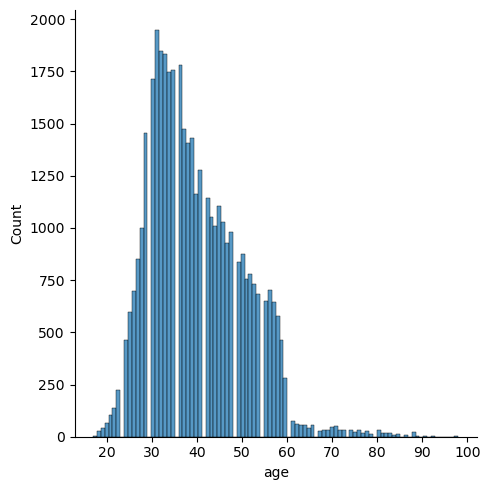

In [8]:
sns.displot(numerical_df.age)

In [9]:
sns.displot(numerical_df.duration)

In [10]:
sns.countplot(x=numerical_df.campaign)

<AxesSubplot:xlabel='campaign', ylabel='count'>

In [11]:
df.campaign.value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

In [12]:
sns.countplot(x=numerical_df.pdays)

<AxesSubplot:xlabel='pdays', ylabel='count'>

In [13]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [14]:
sns.countplot(x=numerical_df.previous)

<AxesSubplot:xlabel='previous', ylabel='count'>

In [15]:
categorical_df = df.select_dtypes('O')

In [16]:
categorical_df

job marital_status            education  default housing loan  \
0        housemaid        married             basic.4y       no      no   no   
1         services        married          high.school  unknown      no   no   
2         services        married          high.school       no     yes   no   
3           admin.        married             basic.6y       no      no   no   
4         services        married          high.school       no      no  yes   
...            ...            ...                  ...      ...     ...  ...   
41183      retired        married  professional.course       no     yes   no   
41184  blue-collar        married  professional.course       no      no   no   
41185      retired        married    university.degree       no     yes   no   
41186   technician        married  professional.course       no      no   no   
41187      retired        married  professional.course       no     yes   no   

         contact month day_of_week     poutcome response  
0      telephone   may         mon  nonexistent       no  
1      telephone   may         mon  nonexistent       no  
2      telephone   may         mon  nonexistent       no  
3      telephone   may         mon  nonexistent       no  
4      telephone   may         mon  nonexistent       no  
...          ...   ...         ...          ...      ...  
41183   cellular   nov         fri  nonexistent      yes  
41184   cellular   nov         fri  nonexistent       no  
41185   cellular   nov         fri  nonexistent       no  
41186   cellular   nov         fri  nonexistent      yes  
41187   cellular   nov         fri      failure       no  

[41188 rows x 11 columns]

In [17]:
sns.countplot(x=categorical_df.job)
plt.xticks(rotation=90);

In [18]:
sns.countplot(x=categorical_df.marital_status)
plt.xticks(rotation=90);

In [19]:
sns.countplot(x=categorical_df.education)
plt.xticks(rotation=90);

In [20]:
sns.countplot(x=categorical_df.default)
plt.xticks(rotation=90);

In [21]:
sns.countplot(x=categorical_df.loan)
plt.xticks(rotation=90);

In [22]:
sns.countplot(x=categorical_df.housing)
plt.xticks(rotation=90);

In [23]:
sns.countplot(x=categorical_df.contact)
plt.xticks(rotation=90);

In [24]:
sns.countplot(x=categorical_df.month)
plt.xticks(rotation=90);

In [25]:
sns.countplot(x=categorical_df.day_of_week)
plt.xticks(rotation=90);

In [26]:
sns.countplot(x=categorical_df.response)
plt.xticks(rotation=90);

### Bivariate Analysis

In [27]:
df.head()

age        job marital_status    education  default housing loan  \
0   56  housemaid        married     basic.4y       no      no   no   
1   57   services        married  high.school  unknown      no   no   
2   37   services        married  high.school       no     yes   no   
3   40     admin.        married     basic.6y       no      no   no   
4   56   services        married  high.school       no      no  yes   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   may         mon  ...         1    999         0  nonexistent   
2  telephone   may         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         1    999         0  nonexistent   
4  telephone   may         mon  ...         1    999         0  nonexistent   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  \
0          1.1          93.994          -36.4      4.857       5191.0   
1          1.1          93.994          -36.4      4.857       5191.0   
2          1.1          93.994          -36.4      4.857       5191.0   
3          1.1          93.994          -36.4      4.857       5191.0   
4          1.1          93.994          -36.4      4.857       5191.0   

   response  
0        no  
1        no  
2        no  
3        no  
4        no  

[5 rows x 21 columns]

In [28]:
sns.boxplot(x=df.response, y=df.age)

<AxesSubplot:xlabel='response', ylabel='age'>

In [29]:
pd.crosstab(df.age, df.response).tail(30)

response  no  yes
age              
65        21   23
66        28   29
67        15   11
68        18   15
69        20   14
70        28   19
71        32   21
72        21   13
73        21   13
74        17   15
75        13   11
76        16   18
77         7   13
78        13   14
79         7    7
80        13   18
81        12    8
82         6   11
83         9    8
84         4    3
85         8    7
86         3    5
87         0    1
88        13    9
89         0    2
91         2    0
92         1    3
94         1    0
95         1    0
98         0    2

In [30]:
pd.crosstab(df.age, df.response).plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='age'>

#### The customers with the age greater than 60 years have very high response rate

In [31]:
pd.crosstab(df.job, df.response).plot(kind='bar', figsize=(12,6))

<AxesSubplot:xlabel='job'>

In [32]:
temp = pd.crosstab(df.job, df.response)

In [33]:
temp['total'] = temp.no + temp.yes

In [34]:
temp['prob_yes'] = temp.yes/temp.total

In [35]:
sns.barplot(x=temp.index, y=temp.prob_yes)
plt.xticks(rotation=90);

In [36]:
temp = pd.crosstab(df.marital_status, df.response)

In [37]:
temp['total'] = temp.no + temp.yes

In [38]:
temp['prob_yes'] = temp.yes/temp.total

In [39]:
sns.barplot(x=temp.index, y=temp.prob_yes)
plt.xticks(rotation=90);

In [40]:
df.replace('unknown', np.nan).isnull().mean()

age               0.000000
job               0.008012
marital_status    0.001942
education         0.042027
default           0.208726
housing           0.024036
loan              0.024036
contact           0.000000
month             0.000000
day_of_week       0.000000
duration          0.000000
campaign          0.000000
pdays             0.000000
previous          0.000000
poutcome          0.000000
emp_var_rate      0.000000
cons_price_idx    0.000000
cons_conf_idx     0.000000
euribor3m         0.000000
nr_employed       0.000000
response          0.000000
dtype: float64

In [41]:
df_v1 = df.replace('unknown', np.nan).dropna(subset=['housing', 'education', 'job', 'marital_status'])

In [42]:
(df.shape[0] - df_v1.shape[0])/df.shape[0]

0.07145285034476061

In [43]:
df_v1.isnull().sum()

age                  0
job                  0
marital_status       0
education            0
default           7757
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
response             0
dtype: int64

In [44]:
sns.countplot(x=df.default)

<AxesSubplot:xlabel='default', ylabel='count'>

In [45]:
df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [46]:
pd.crosstab(df.default, df.response).plot(kind='bar', figsize=(12,6))
plt.yscale('log')

In [47]:
df_v1.replace(np.nan, 'unknown', inplace=True)

In [48]:
df_v1

age          job marital_status            education  default housing  \
0       56    housemaid        married             basic.4y       no      no   
1       57     services        married          high.school  unknown      no   
2       37     services        married          high.school       no     yes   
3       40       admin.        married             basic.6y       no      no   
4       56     services        married          high.school       no      no   
...    ...          ...            ...                  ...      ...     ...   
41183   73      retired        married  professional.course       no     yes   
41184   46  blue-collar        married  professional.course       no      no   
41185   56      retired        married    university.degree       no     yes   
41186   44   technician        married  professional.course       no      no   
41187   74      retired        married  professional.course       no     yes   

      loan    contact month day_of_week  ...  campaign  pdays  previous  \
0       no  telephone   may         mon  ...         1    999         0   
1       no  telephone   may         mon  ...         1    999         0   
2       no  telephone   may         mon  ...         1    999         0   
3       no  telephone   may         mon  ...         1    999         0   
4      yes  telephone   may         mon  ...         1    999         0   
...    ...        ...   ...         ...  ...       ...    ...       ...   
41183   no   cellular   nov         fri  ...         1    999         0   
41184   no   cellular   nov         fri  ...         1    999         0   
41185   no   cellular   nov         fri  ...         2    999         0   
41186   no   cellular   nov         fri  ...         1    999         0   
41187   no   cellular   nov         fri  ...         3    999         1   

          poutcome emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr_employed  response  
0           5191.0        no  
1           5191.0        no  
2           5191.0        no  
3           5191.0        no  
4           5191.0        no  
...            ...       ...  
41183       4963.6       yes  
41184       4963.6        no  
41185       4963.6        no  
41186       4963.6       yes  
41187       4963.6        no  

[38245 rows x 21 columns]

### KnowNearest Neighbos

In [49]:
X = df_v1.drop(['response', 'duration'], axis=1)
y = df_v1['response'].map({'yes':1, 'no':0})

In [50]:
X_dummies = pd.get_dummies(X)

In [51]:
X_dummies

age  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0       56         1    999         0           1.1          93.994   
1       57         1    999         0           1.1          93.994   
2       37         1    999         0           1.1          93.994   
3       40         1    999         0           1.1          93.994   
4       56         1    999         0           1.1          93.994   
...    ...       ...    ...       ...           ...             ...   
41183   73         1    999         0          -1.1          94.767   
41184   46         1    999         0          -1.1          94.767   
41185   56         2    999         0          -1.1          94.767   
41186   44         1    999         0          -1.1          94.767   
41187   74         3    999         1          -1.1          94.767   

       cons_conf_idx  euribor3m  nr_employed  job_admin.  ...  month_oct  \
0              -36.4      4.857       5191.0           0  ...          0   
1              -36.4      4.857       5191.0           0  ...          0   
2              -36.4      4.857       5191.0           0  ...          0   
3              -36.4      4.857       5191.0           1  ...          0   
4              -36.4      4.857       5191.0           0  ...          0   
...              ...        ...          ...         ...  ...        ...   
41183          -50.8      1.028       4963.6           0  ...          0   
41184          -50.8      1.028       4963.6           0  ...          0   
41185          -50.8      1.028       4963.6           0  ...          0   
41186          -50.8      1.028       4963.6           0  ...          0   
41187          -50.8      1.028       4963.6           0  ...          0   

       month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0              0                0                1                0   
1              0                0                1                0   
2              0                0                1                0   
3              0                0                1                0   
4              0                0                1                0   
...          ...              ...              ...              ...   
41183          0                1                0                0   
41184          0                1                0                0   
41185          0                1                0                0   
41186          0                1                0                0   
41187          0                1                0                0   

       day_of_week_tue  day_of_week_wed  poutcome_failure  \
0                    0                0                 0   
1                    0                0                 0   
2                    0                0                 0   
3                    0                0                 0   
4                    0                0                 0   
...                ...              ...               ...   
41183                0                0                 0   
41184                0                0                 0   
41185                0                0                 0   
41186                0                0                 0   
41187                0                0                 1   

       poutcome_nonexistent  poutcome_success  
0                         1                 0  
1                         1                 0  
2                         1                 0  
3                         1                 0  
4                         1                 0  
...                     ...               ...  
41183                     1                 0  
41184                     1                 0  
41185                     1                 0  
41186                     1                 0  
41187                     0                 0  

[38245 rows x 57 columns]

In [52]:
train_X, test_X, train_y, test_y = train_test_split(np.ascontiguousarray(X_dummies), y, test_size=0.3)

In [53]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)

KNeighborsClassifier()

In [54]:
knn.score(test_X, test_y)

0.8887048980303295

In [55]:
print(classification_report(knn.predict(test_X), test_y))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94     10742
           1       0.29      0.51      0.37       732

    accuracy                           0.89     11474
   macro avg       0.63      0.71      0.65     11474
weighted avg       0.92      0.89      0.90     11474



In [56]:
train_X, test_X, train_y, test_y = train_test_split(X_dummies, y, test_size=0.3)

In [57]:
nb = BernoulliNB()
nb.fit(train_X, train_y)

BernoulliNB()

In [58]:
print(classification_report(nb.predict(test_X), test_y))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9797
           1       0.43      0.33      0.37      1677

    accuracy                           0.84     11474
   macro avg       0.66      0.63      0.64     11474
weighted avg       0.82      0.84      0.83     11474



In [59]:
svc = SVC()
svc.fit(train_X, train_y)

SVC()

In [60]:
print(classification_report(svc.predict(test_X), test_y))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     11064
           1       0.20      0.62      0.30       410

    accuracy                           0.90     11474
   macro avg       0.59      0.76      0.62     11474
weighted avg       0.96      0.90      0.92     11474



In [61]:
dt = DecisionTreeClassifier()
dt.fit(train_X, train_y)

DecisionTreeClassifier()

In [62]:
print(classification_report(dt.predict(train_X), train_y))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     23907
           1       0.96      1.00      0.98      2864

    accuracy                           1.00     26771
   macro avg       0.98      1.00      0.99     26771
weighted avg       1.00      1.00      1.00     26771



In [63]:
print(classification_report(dt.predict(test_X), test_y))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     10060
           1       0.36      0.32      0.34      1414

    accuracy                           0.85     11474
   macro avg       0.63      0.62      0.63     11474
weighted avg       0.84      0.85      0.84     11474



### Hyperparammeter Tuning

In [64]:
!pip install tqdm
from tqdm import tqdm

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(np.ascontiguousarray(X_dummies), y, test_size=0.3)

neighbors = [i for i in range(2,50)]

train_acc = list()
test_acc = list()

for k in tqdm(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_y)
    train_acc.append(knn.score(train_X, train_y))
    test_acc.append(knn.score(test_X, test_y))

 50%|█████████████████████████████████████████                                         | 24/48 [12:59<13:05, 32.73s/it]

In [ ]:
plt.plot(neighbors, train_acc, label='train acc')
plt.plot(neighbors, test_acc, label='test acc')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.legend()

### Hyperpaameter Tuning - Support Vector Machines

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C':[0.1, 1, 10, 100],
    'gamma':[5, 0.1, 0.001, 0.00001]
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='recall', verbose=2, n_jobs=4, return_train_score=True)
grid.fit(X_dummies.iloc[:10000], y.iloc[:10000])

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
pd.DataFrame(grid.cv_results_)

### Hyperpaameter Tuning - Decision Trees

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth':[3,4,5],
    'min_samples_split':[6,7,8],
    'min_samples_leaf': [3,4,5]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='recall', verbose=2, return_train_score=True)
grid.fit(X_dummies, y)

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
pd.DataFrame(grid.cv_results_)

In [ ]:
grid.predict(test_X)

In [ ]:
grid.best_estimator_.predict(test_X)

In [ ]:
print(classification_report(test_y, grid.predict(test_X)))